# Assignment 8

To implement and analyze the SIFT (Scale-Invariant Feature Transform) feature
descriptor for detecting and describing keypoints in images, and to understand its application in image matching and object recognition.

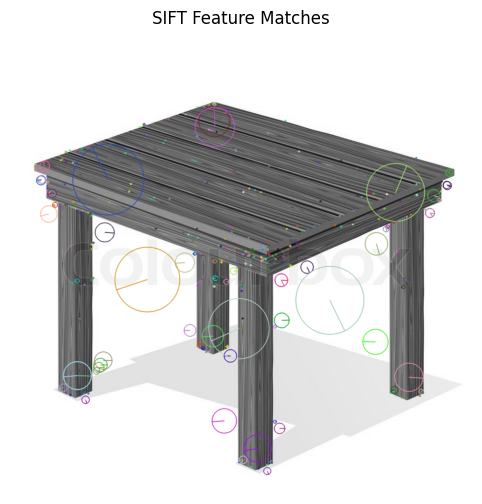

In [3]:
import cv2
import matplotlib.pyplot as plt

# ---------- Step 1: Load two images in grayscale ----------
img = cv2.imread('pic5.jpg', cv2.IMREAD_GRAYSCALE)

# ---------- Step 2: Create SIFT detector ----------
sift = cv2.SIFT_create()

# ---------- Step 3: Detect keypoints and compute descriptors ----------
kp, des = sift.detectAndCompute(img, None)

image_sift = cv2.drawKeypoints(img, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# ---------- Step 7: Display result using Matplotlib ----------
plt.figure(figsize=(12,6))
plt.imshow(cv2.cvtColor(image_sift, cv2.COLOR_BGR2RGB))
plt.title("SIFT Feature Matches")
plt.axis('off')
plt.show()